In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set your working path
base_dir = "C:/Users/Admin/Desktop/neometrix"
bad_dir = os.path.join(base_dir, "bad")
mask_dir = os.path.join(base_dir, "output_masks")
bbox_vis_dir = os.path.join(base_dir, "output_bbox")

os.makedirs(mask_dir, exist_ok=True)
os.makedirs(bbox_vis_dir, exist_ok=True)

def detect_scratches(img_path, mask_save_path, vis_save_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, threshold1=30, threshold2=100)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros_like(gray)
    boxed_img = img.copy()

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 150:  # Skip noise
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.drawContours(mask, [cnt], -1, 255, -1)

    filename = os.path.basename(img_path)
    cv2.imwrite(os.path.join(mask_save_path, filename), mask)
    cv2.imwrite(os.path.join(vis_save_path, filename), boxed_img)

# Loop through all bad images
for file in os.listdir(bad_dir):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(bad_dir, file)
        detect_scratches(img_path, mask_dir, bbox_vis_dir)


Skipping .DS_Store - file not loaded properly.


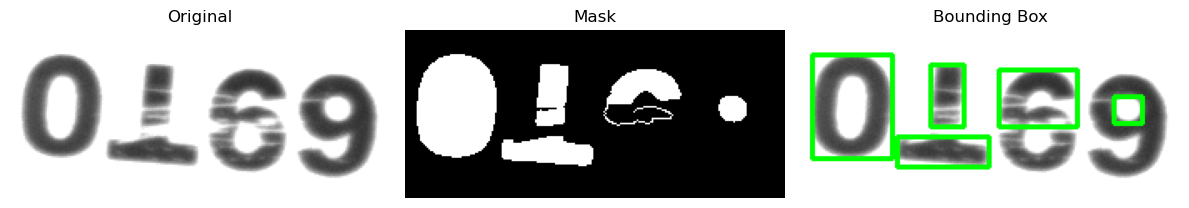

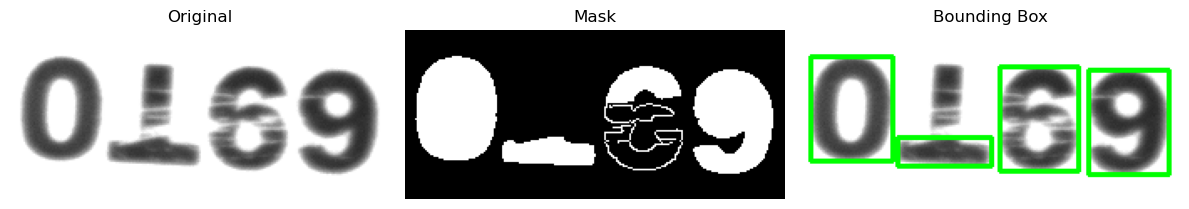

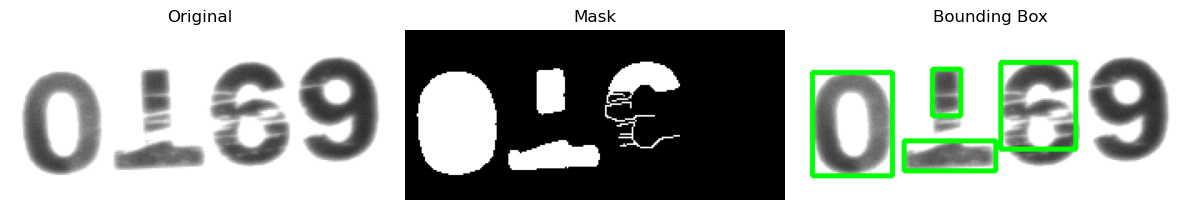

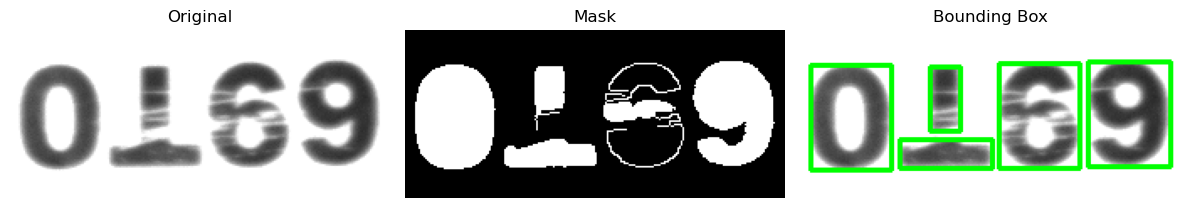

In [6]:
for file in sample_files:
    original_path = os.path.join(bad_dir, file)
    mask_path = os.path.join(mask_dir, file)
    boxed_path = os.path.join(bbox_vis_dir, file)

    original = cv2.imread(original_path)
    masked = cv2.imread(mask_path, 0)
    boxed = cv2.imread(boxed_path)

    if original is None or masked is None or boxed is None:
        print(f"Skipping {file} - file not loaded properly.")
        continue

    plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(masked, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(boxed, cv2.COLOR_BGR2RGB))
    plt.title('Bounding Box')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


Skipping .DS_Store - image not loaded.


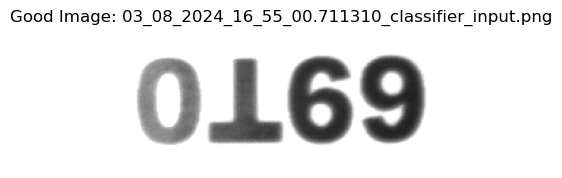

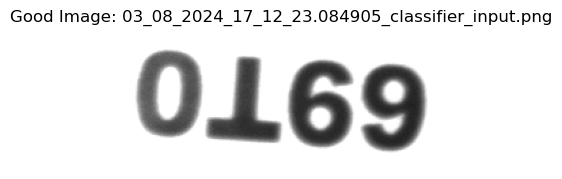

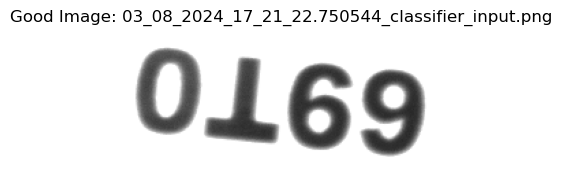

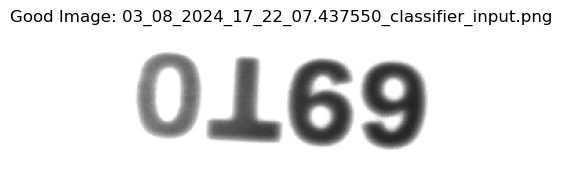

In [10]:
good_dir = os.path.join(base_dir, "good")

import os
import cv2
import matplotlib.pyplot as plt

good_samples = os.listdir(good_dir)[:5]  # Visualize first 5 good images

for file in good_samples:
    good_img_path = os.path.join(good_dir, file)
    good_img = cv2.imread(good_img_path)

    if good_img is None:
        print(f"Skipping {file} - image not loaded.")
        continue

    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(good_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Good Image: {file}")
    plt.axis('off')
    plt.show()


In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

base_dir = r"C:\Users\Admin\Desktop\neometrix"
good_dir = os.path.join(base_dir, "good")

# Simulated folders for masks and bounding box visuals
good_masks_dir = os.path.join(base_dir, "good_masks")
good_bbox_dir = os.path.join(base_dir, "good_bbox")

os.makedirs(good_masks_dir, exist_ok=True)
os.makedirs(good_bbox_dir, exist_ok=True)


In [18]:
for file in os.listdir(good_dir):
    img_path = os.path.join(good_dir, file)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Skipping {file}")
        continue

    h, w = img.shape[:2]

    # Empty mask (all zeros)
    empty_mask = np.zeros((h, w), dtype=np.uint8)
    mask_save_path = os.path.join(good_masks_dir, file)
    cv2.imwrite(mask_save_path, empty_mask)

    # Bounding box overlay is just the original image (no box)
    bbox_save_path = os.path.join(good_bbox_dir, file)
    cv2.imwrite(bbox_save_path, img)


Skipping .DS_Store


Skipping .DS_Store


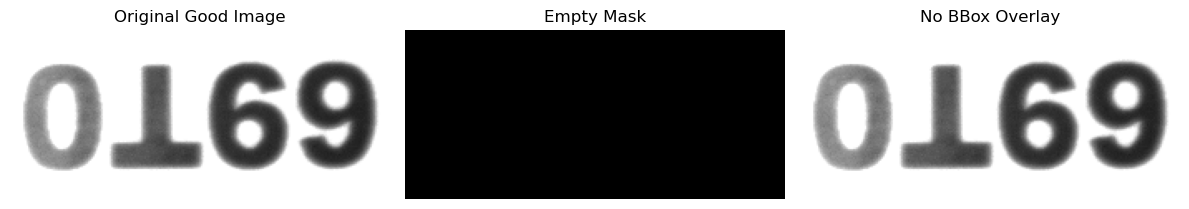

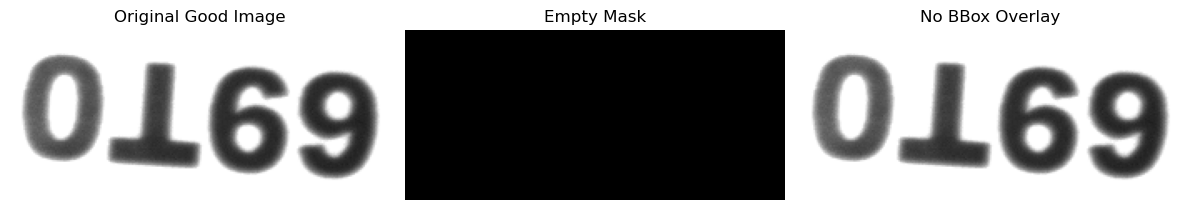

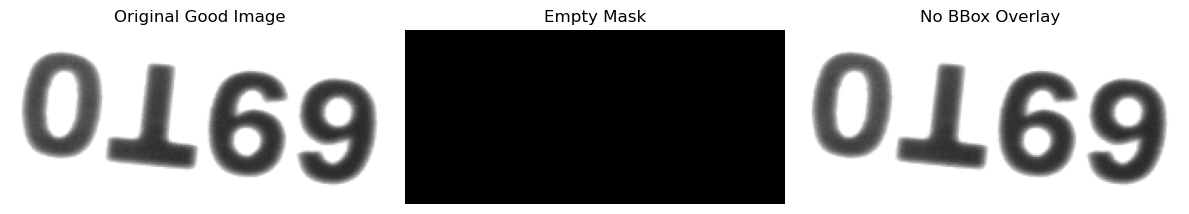

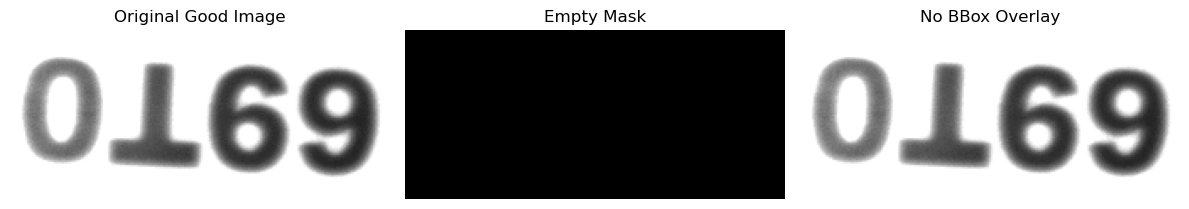

In [19]:
sample_good_files = os.listdir(good_dir)[:5]

for file in sample_good_files:
    img_path = os.path.join(good_dir, file)
    mask_path = os.path.join(good_masks_dir, file)
    bbox_path = os.path.join(good_bbox_dir, file)

    original = cv2.imread(img_path)
    mask = cv2.imread(mask_path, 0)
    bbox_img = cv2.imread(bbox_path)

    if original is None or mask is None or bbox_img is None:
        print(f"Skipping {file}")
        continue

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Good Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Empty Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(bbox_img, cv2.COLOR_BGR2RGB))
    plt.title("No BBox Overlay")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


Skipping .DS_Store (image or mask not found)


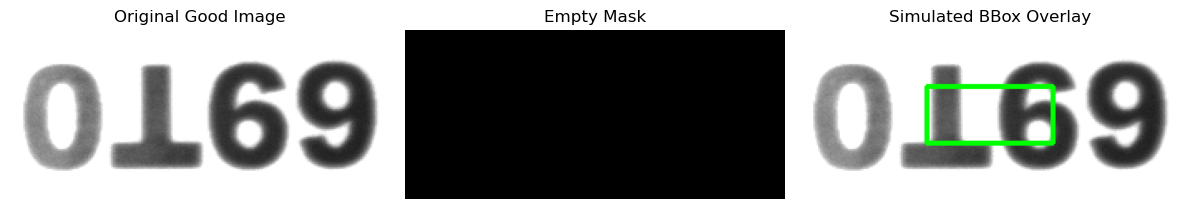

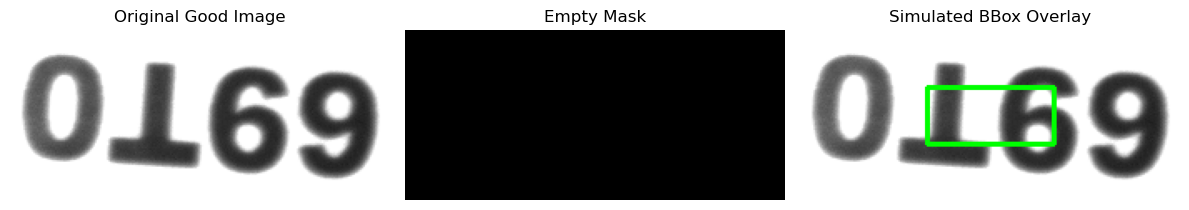

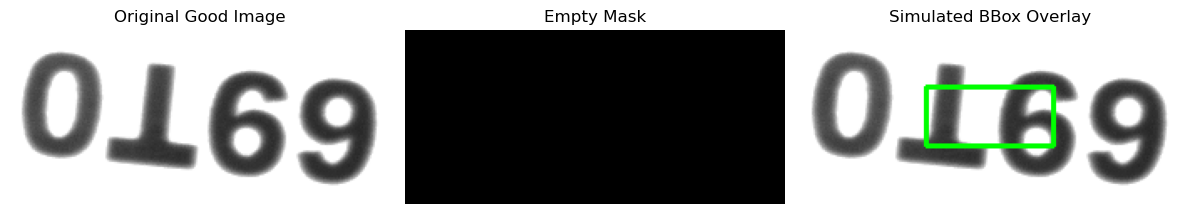

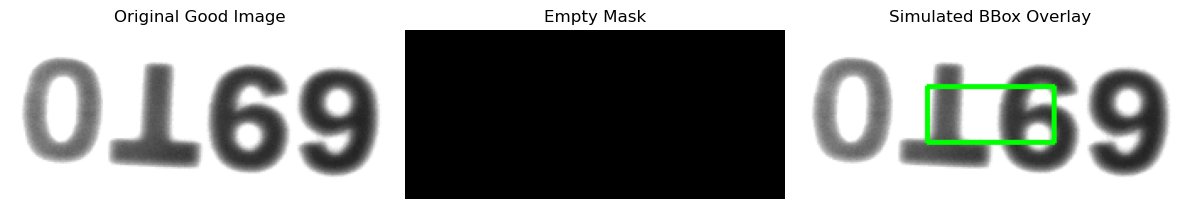

In [24]:
for file in sample_good_files:
    img_path = os.path.join(good_dir, file)
    mask_path = os.path.join(good_masks_dir, file)
    bbox_path = os.path.join(good_bbox_dir, file)

    original = cv2.imread(img_path)
    mask = cv2.imread(mask_path, 0)

    # Ensure image was read properly
    if original is None or mask is None:
        print(f"Skipping {file} (image or mask not found)")
        continue

    bbox_img = original.copy()

    # Simulate bounding box for demo
    h, w = bbox_img.shape[:2]
    start = (w//3, h//3)
    end = (w*2//3, h*2//3)
    cv2.rectangle(bbox_img, start, end, (0, 255, 0), 2)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Good Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Empty Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(bbox_img, cv2.COLOR_BGR2RGB))
    plt.title("Simulated BBox Overlay")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [26]:
print("Unique values in mask:", np.unique(mask))


Unique values in mask: [0]


In [28]:
import cv2
import numpy as np
import os

input_folder = 'good'
output_img_folder = 'augmented_bad'
output_mask_folder = 'augmented_masks'

os.makedirs(output_img_folder, exist_ok=True)
os.makedirs(output_mask_folder, exist_ok=True)

for fname in os.listdir(input_folder):
    if fname.endswith('.png') or fname.endswith('.jpg'):
        path = os.path.join(input_folder, fname)
        img = cv2.imread(path)
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        
        # Simulate a random scratch (white line)
        start_point = (np.random.randint(0, img.shape[1]), np.random.randint(0, img.shape[0]))
        end_point = (start_point[0] + np.random.randint(20, 100), start_point[1] + np.random.randint(5, 20))
        
        thickness = np.random.randint(3, 8)
        color = (255, 255, 255)
        
        cv2.line(img, start_point, end_point, color, thickness)
        cv2.line(mask, start_point, end_point, 255, thickness)
        
        cv2.imwrite(os.path.join(output_img_folder, fname), img)
        cv2.imwrite(os.path.join(output_mask_folder, fname), mask)


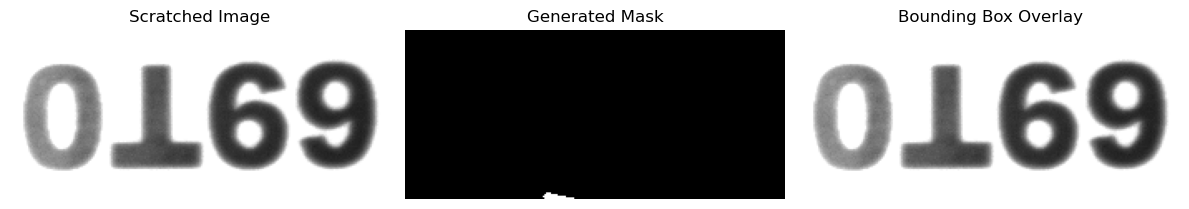

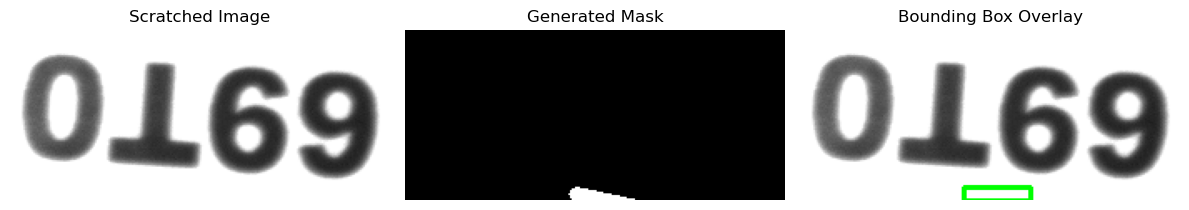

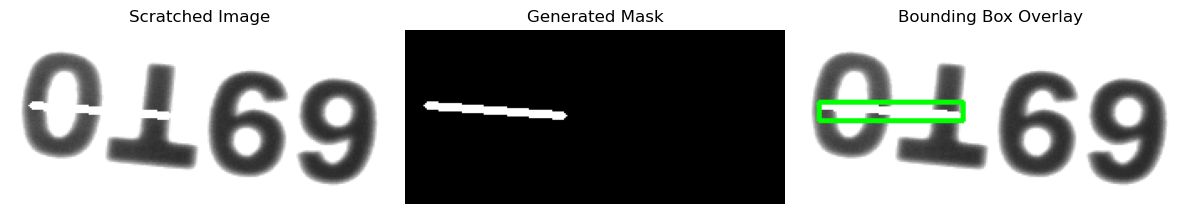

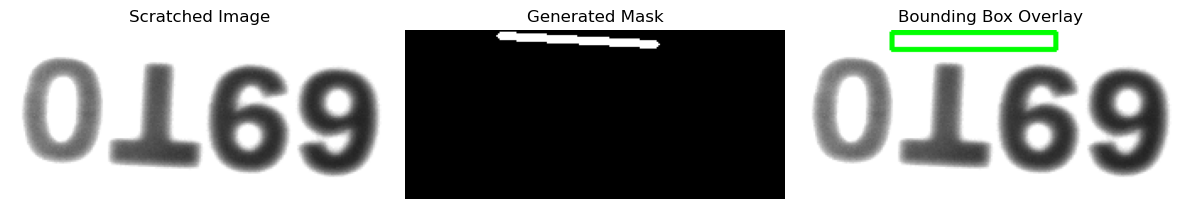

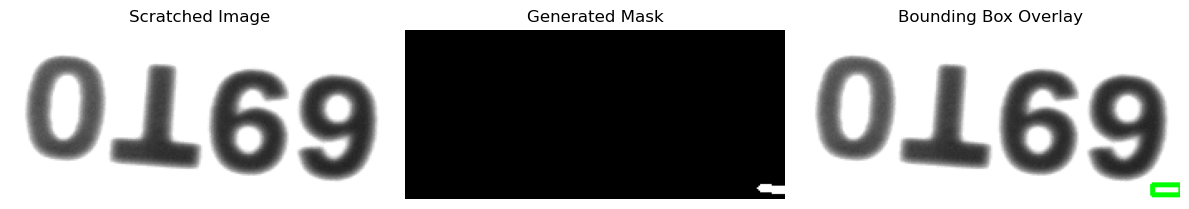

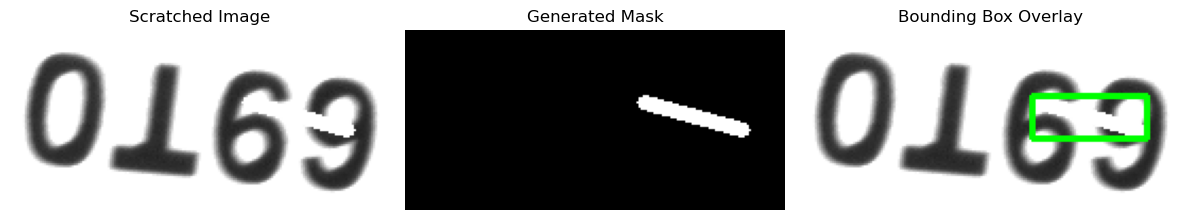

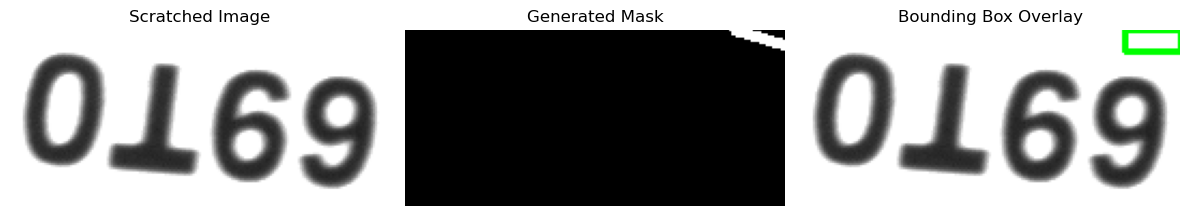

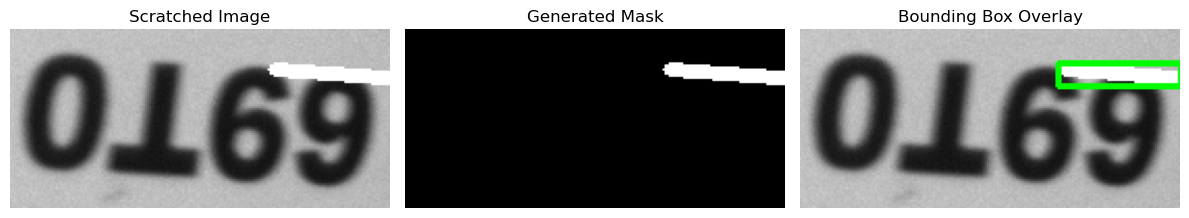

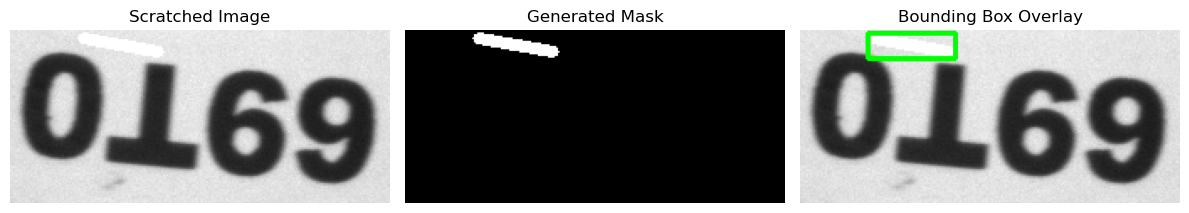

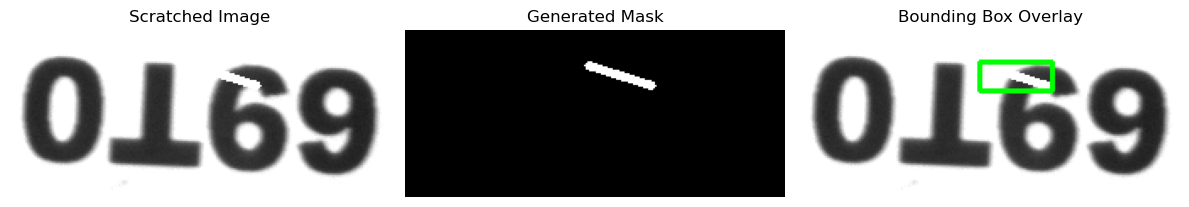

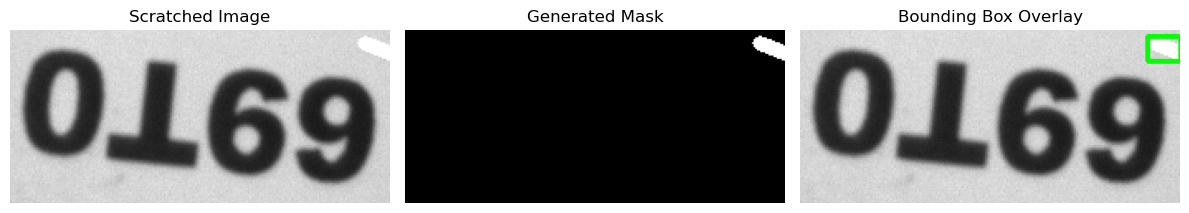

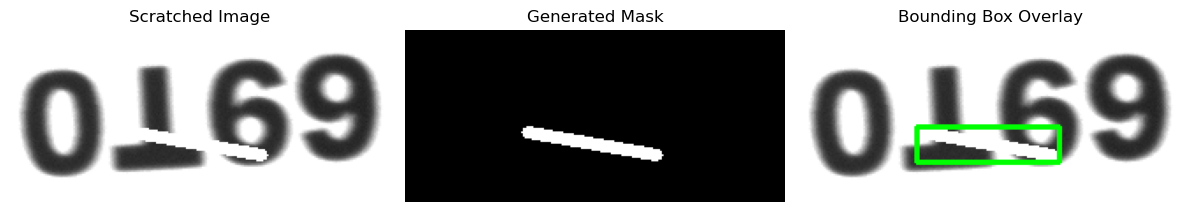

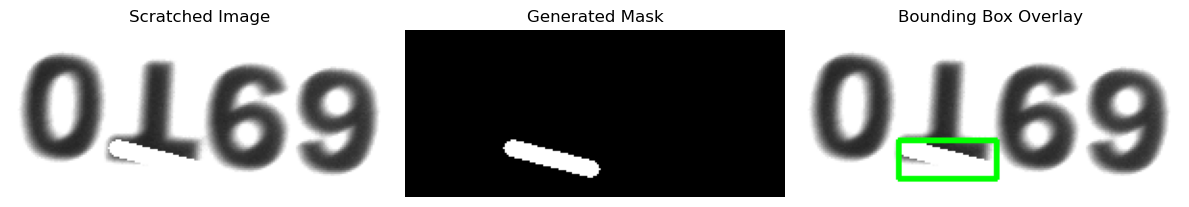

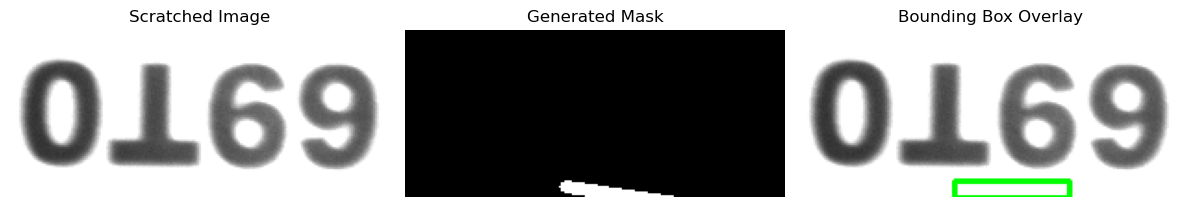

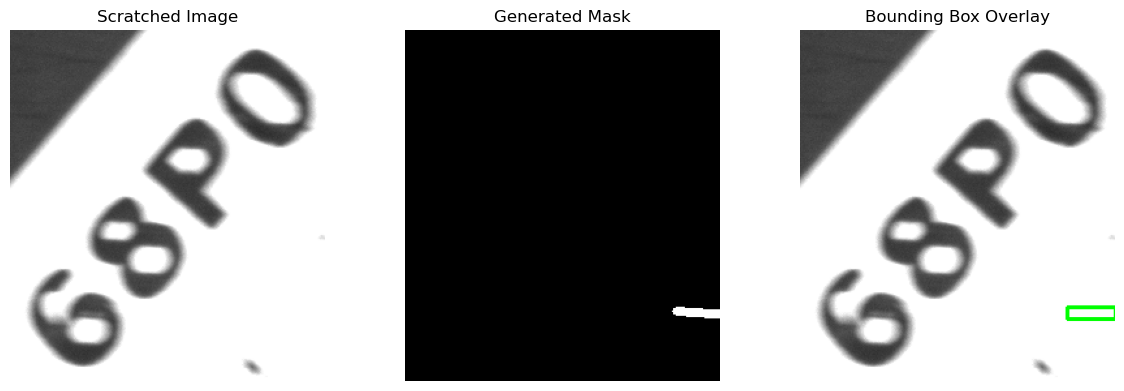

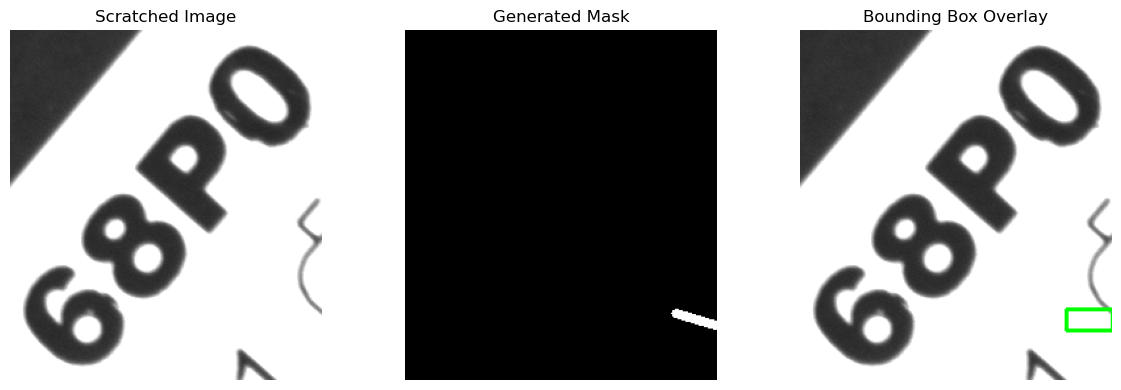

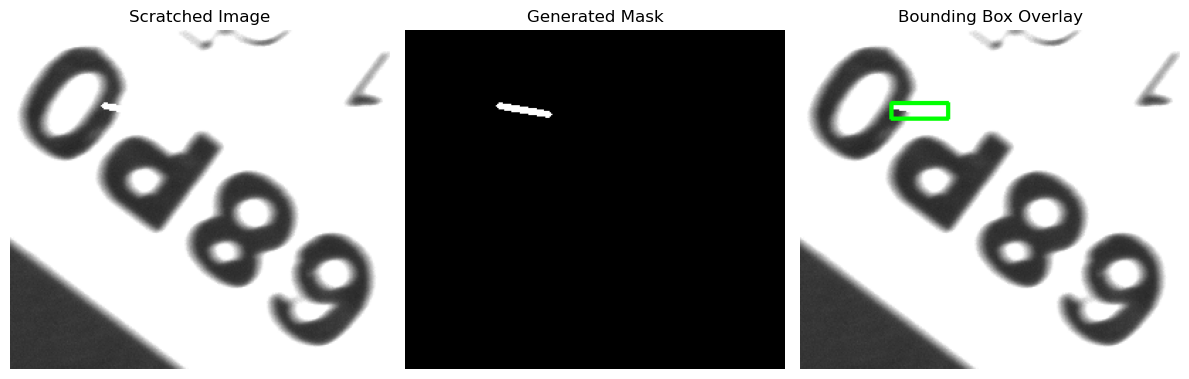

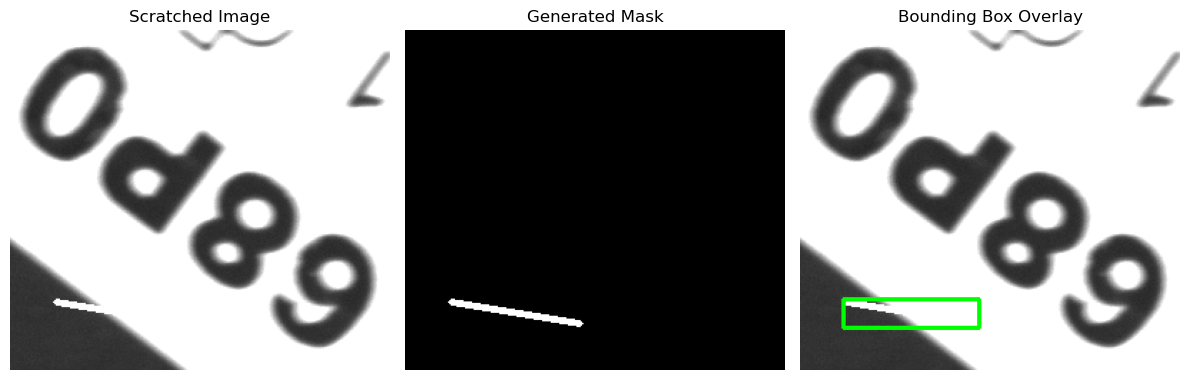

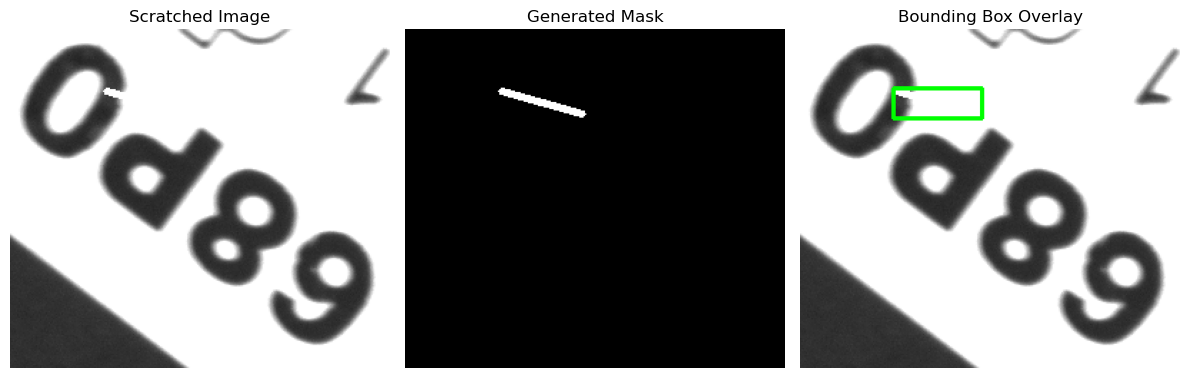

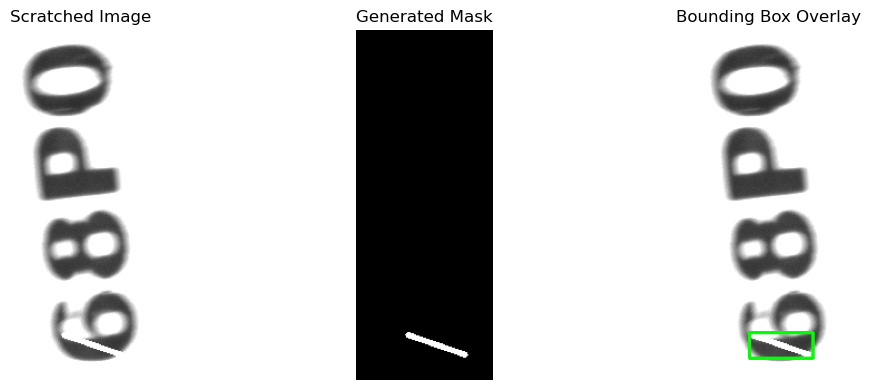

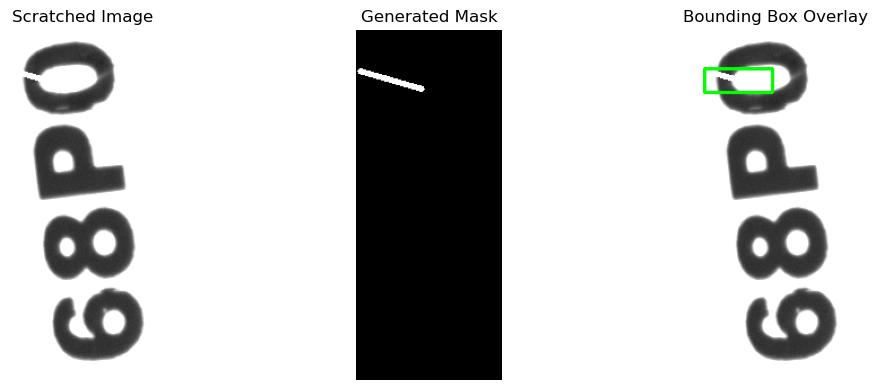

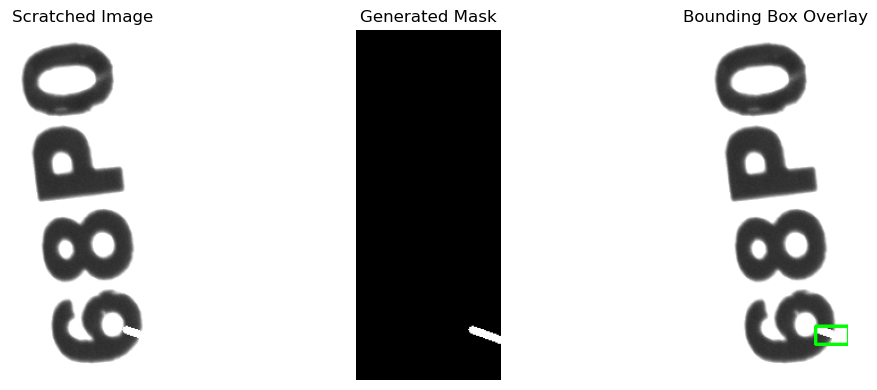

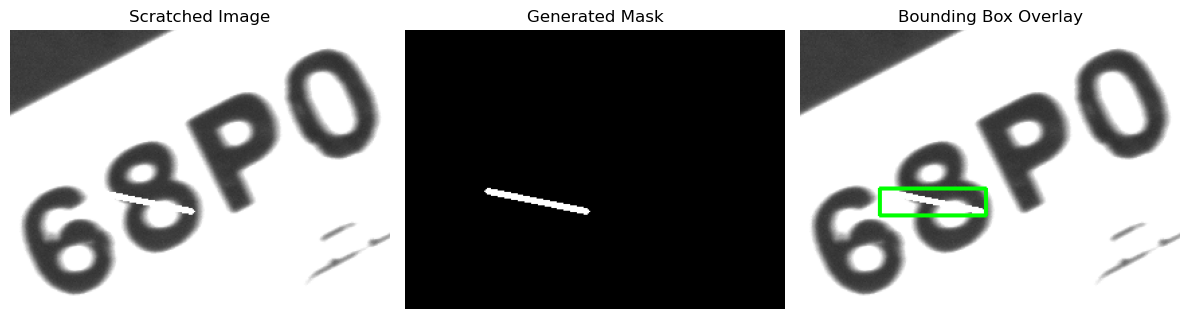

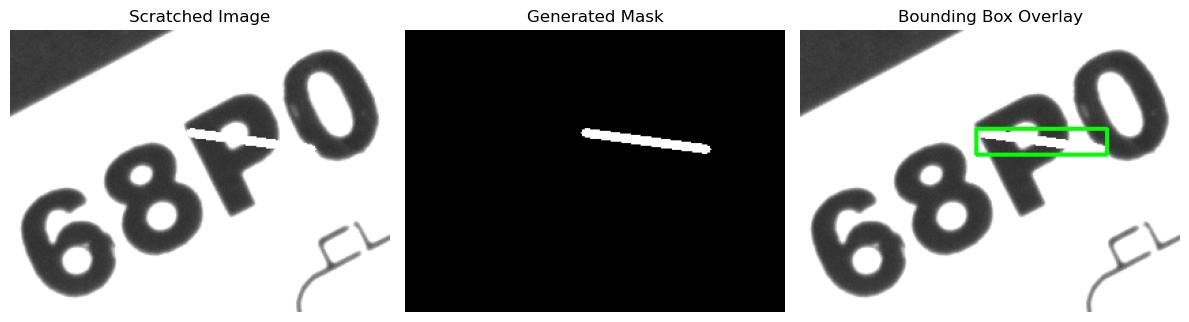

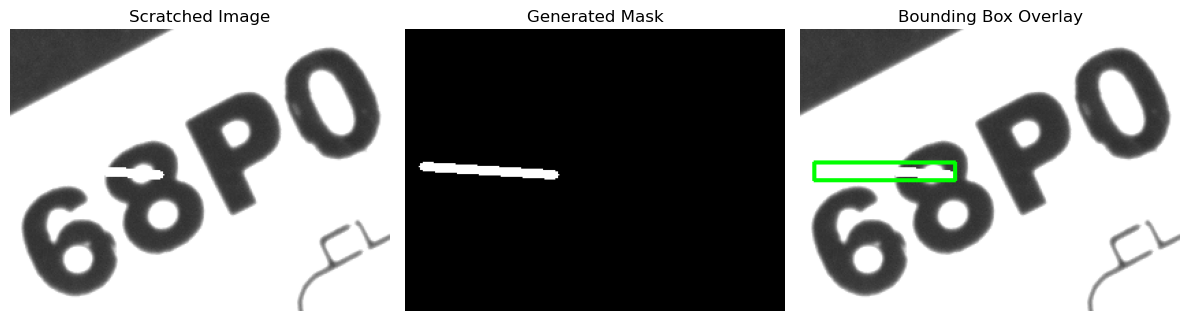

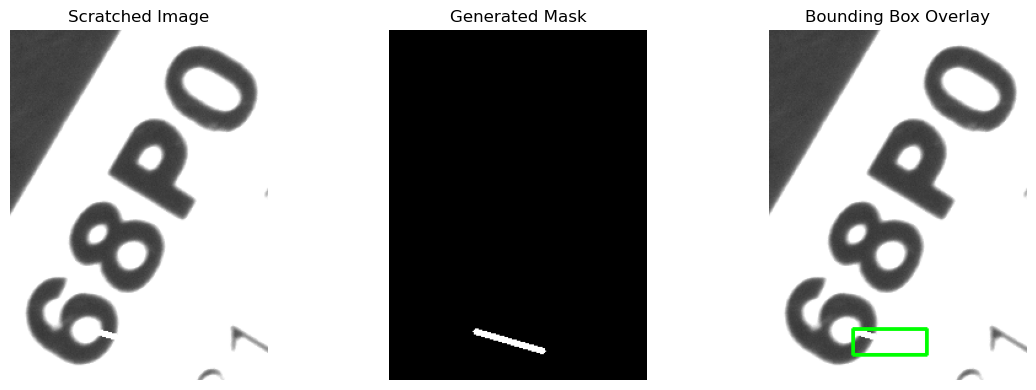

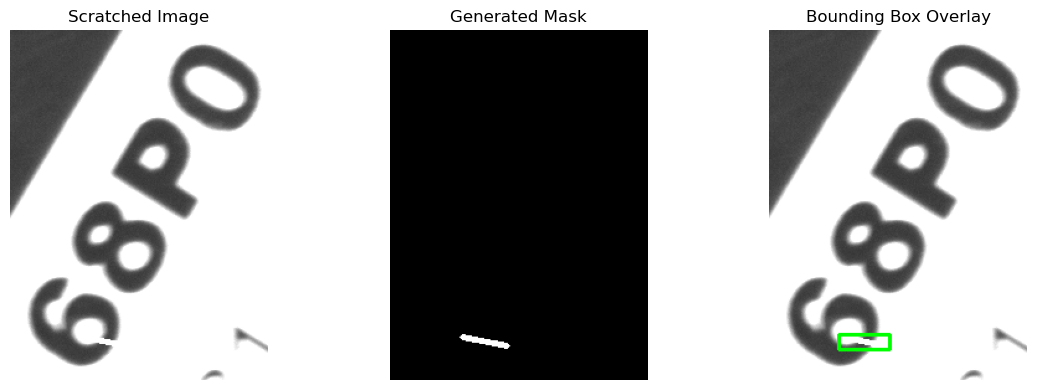

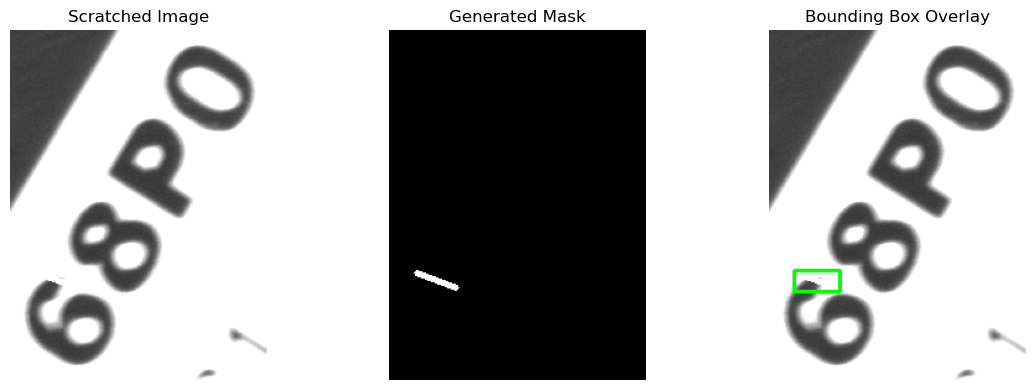

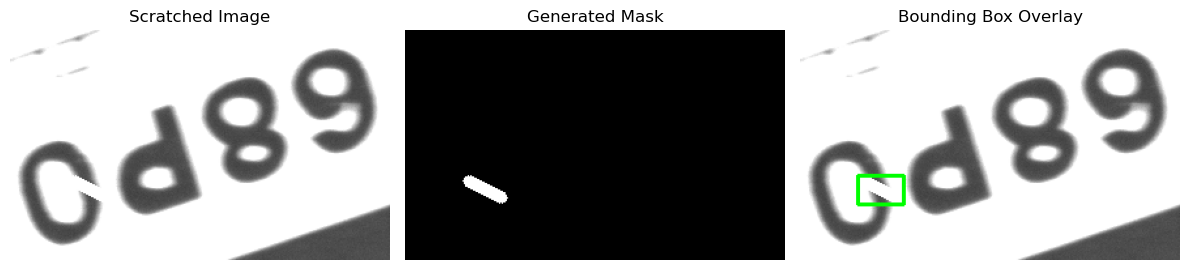

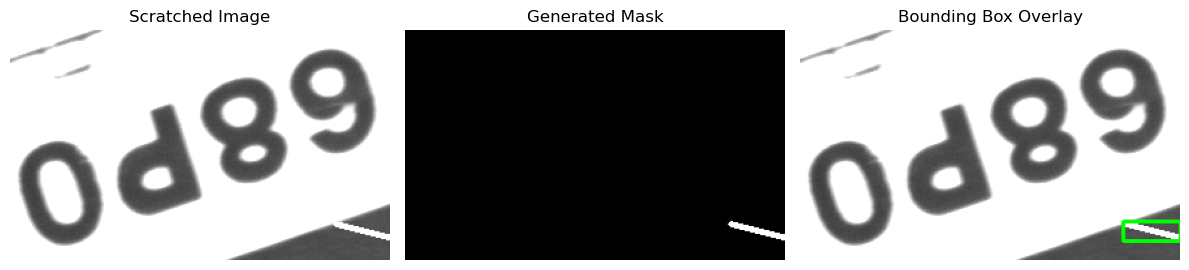

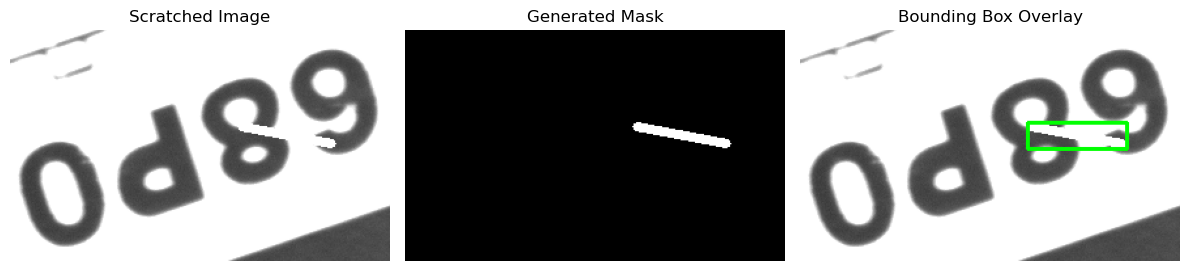

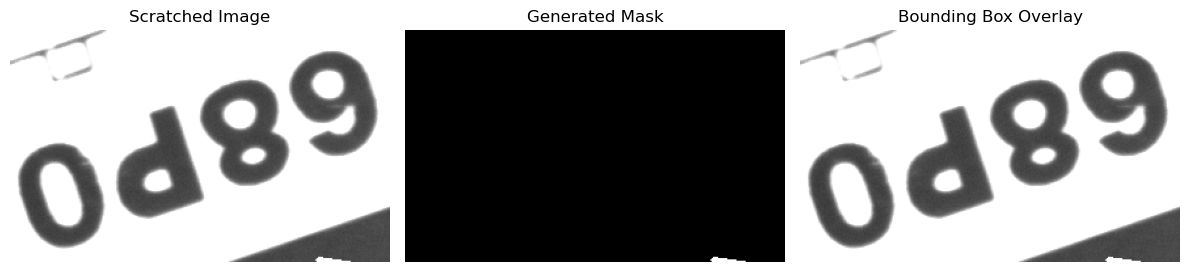

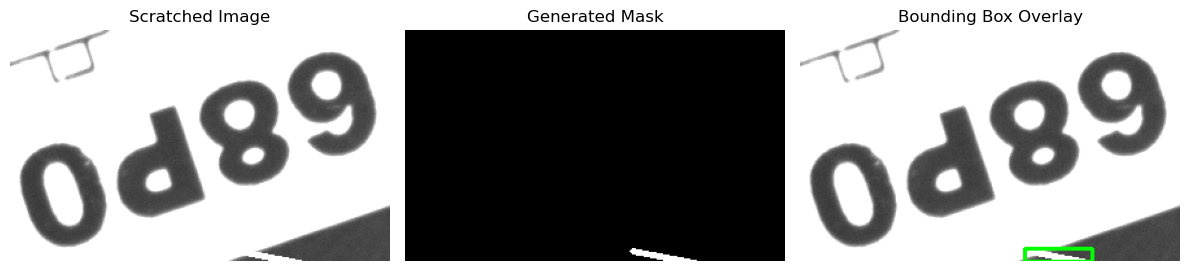

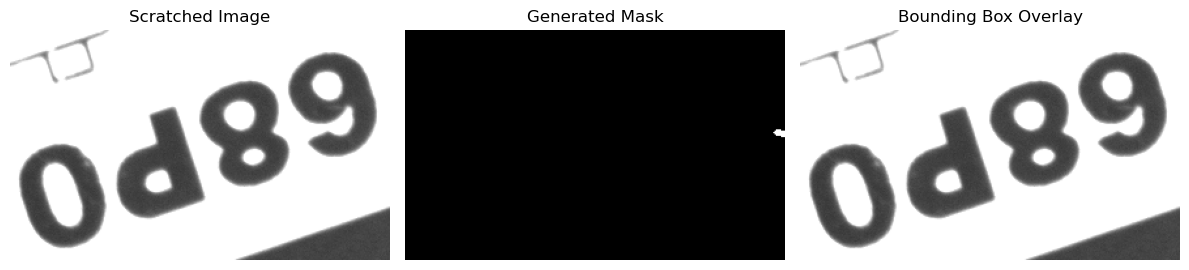

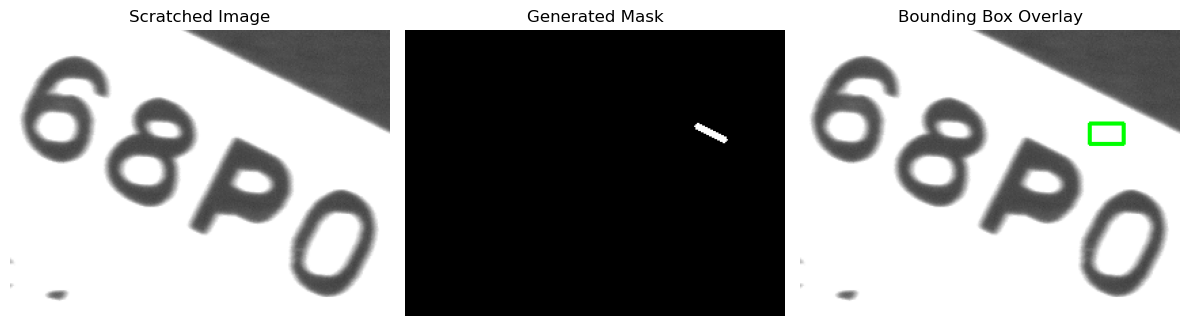

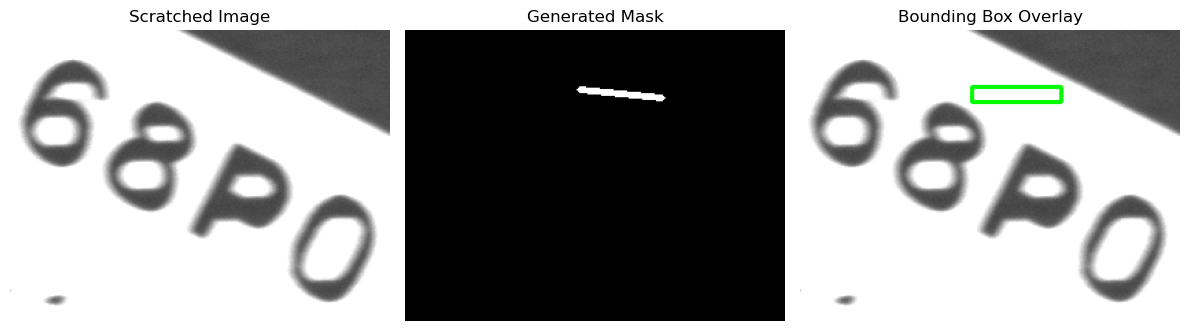

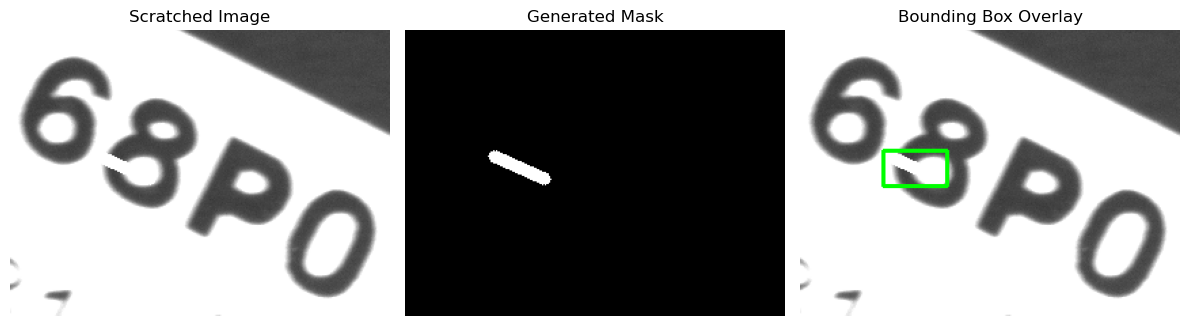

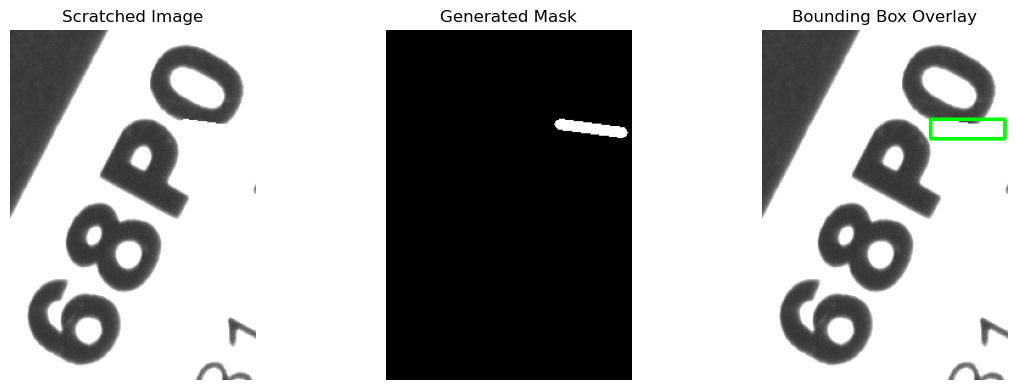

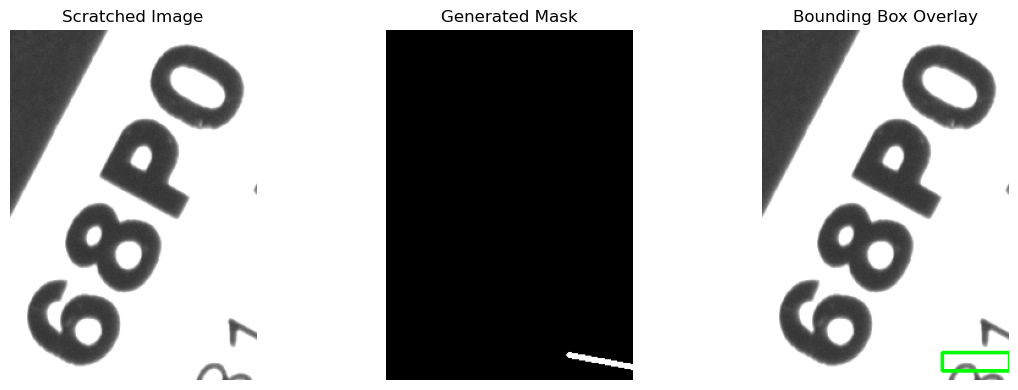

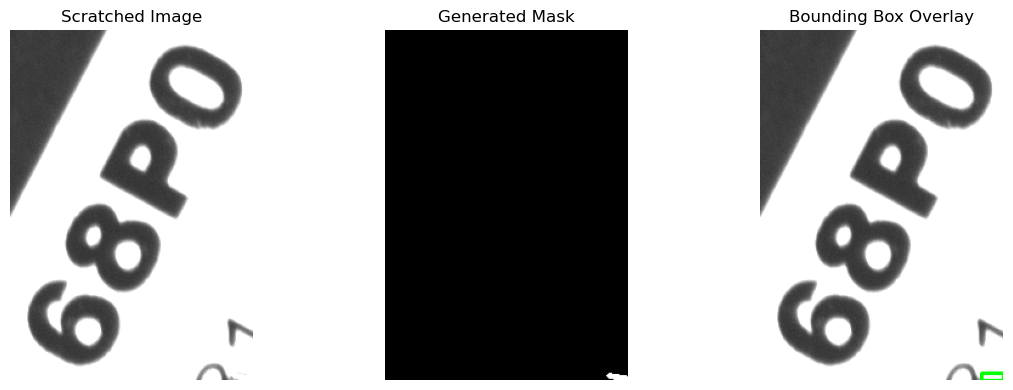

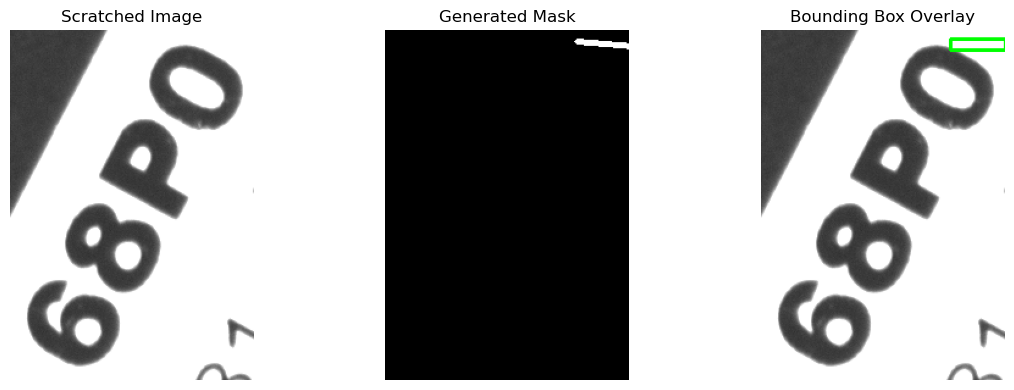

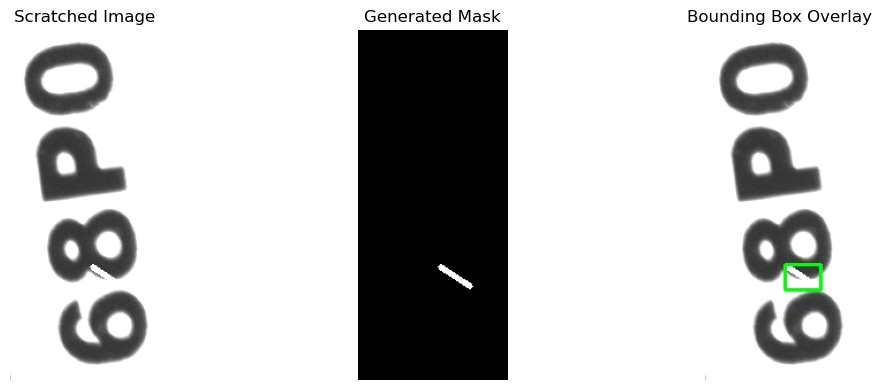

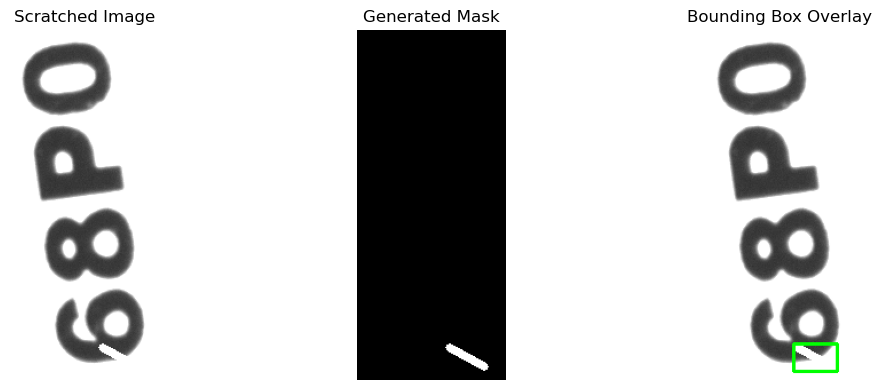

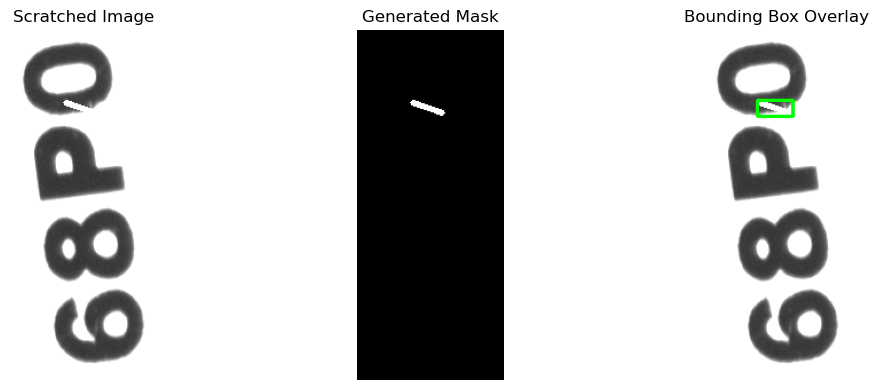

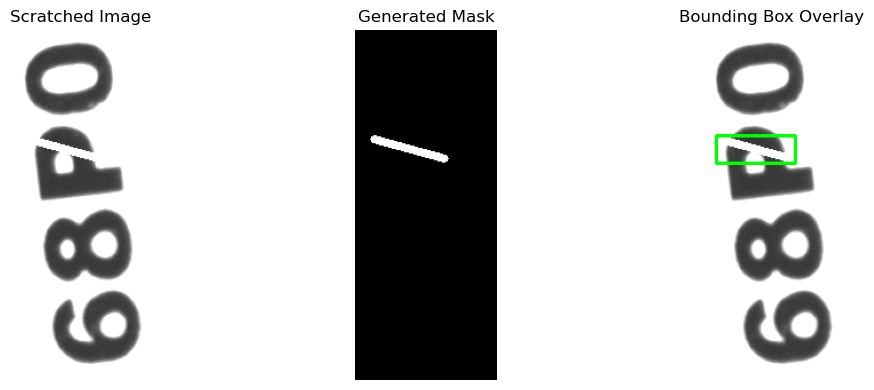

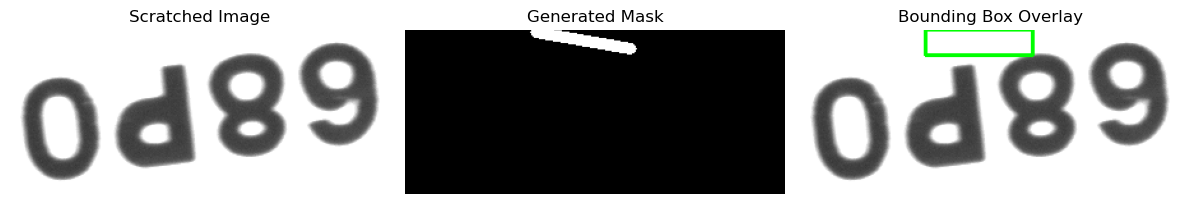

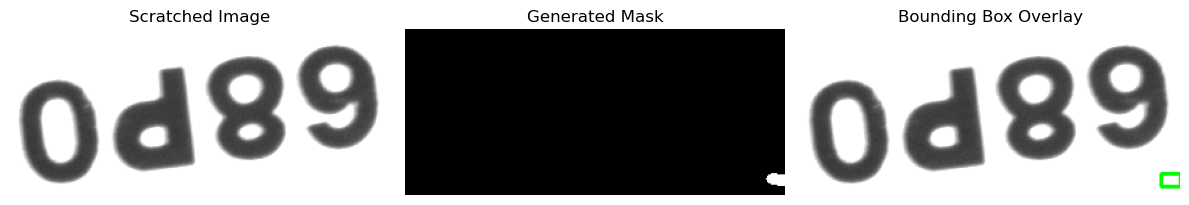

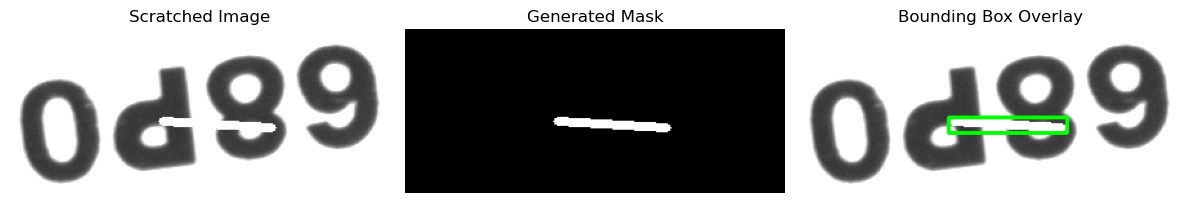

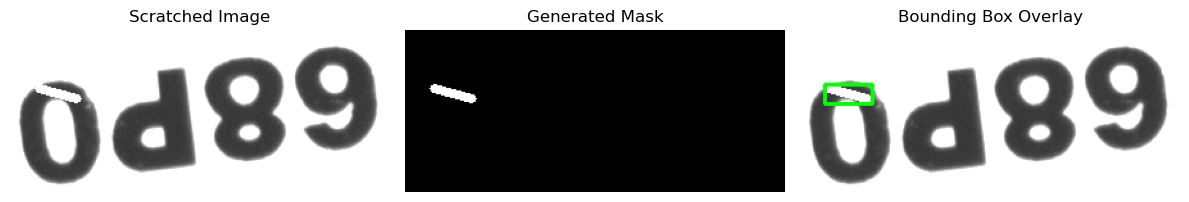

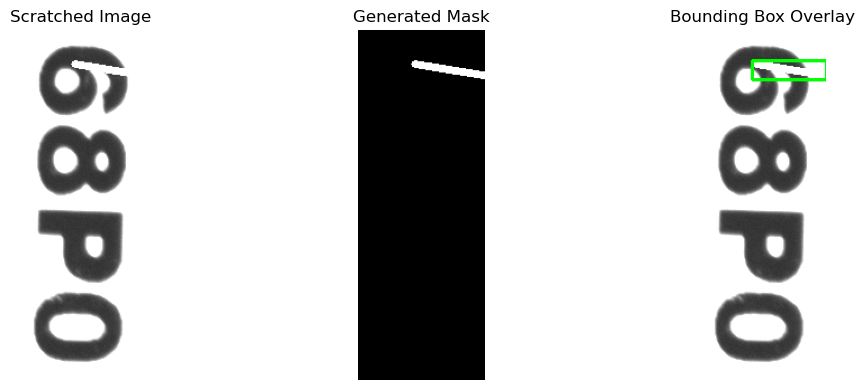

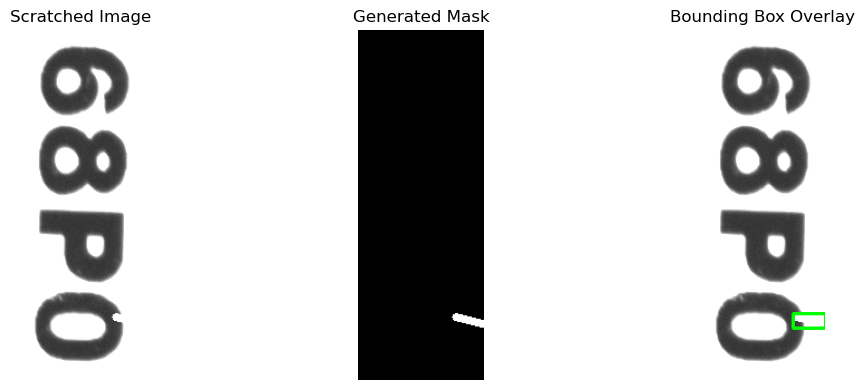

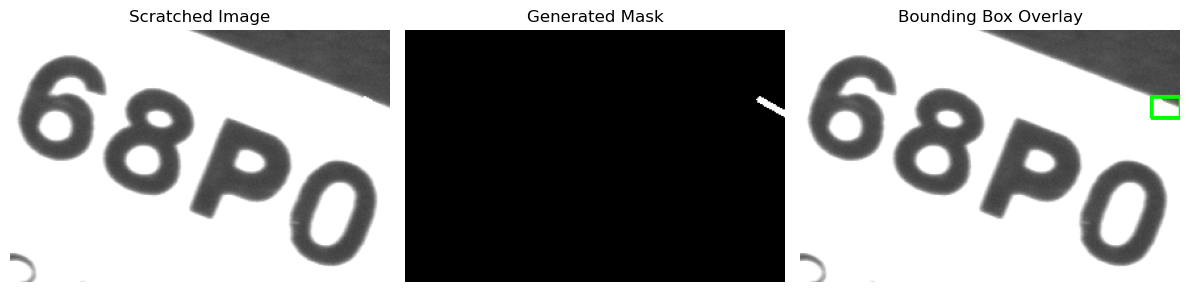

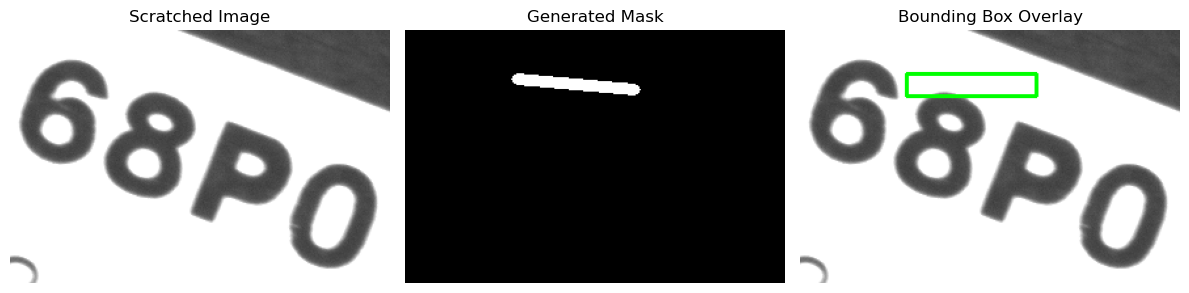

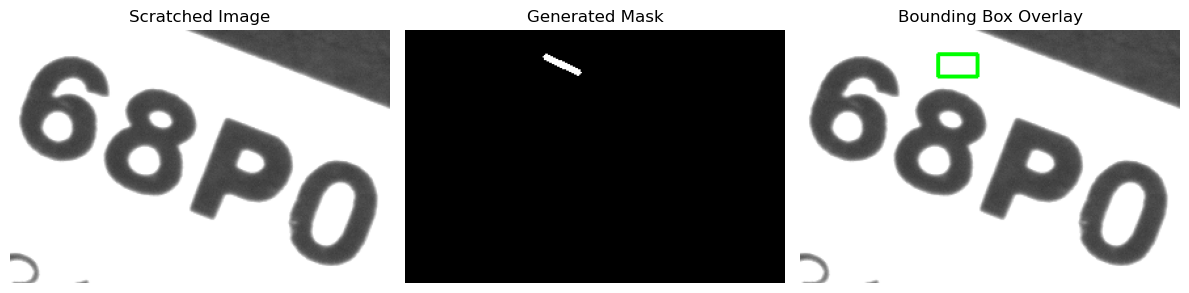

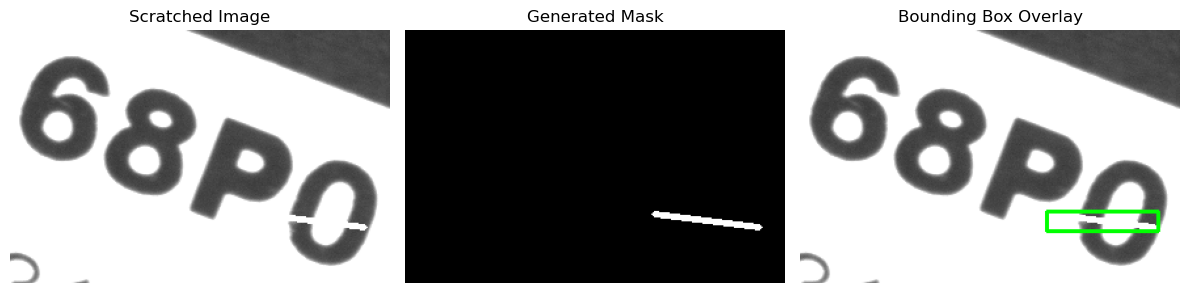

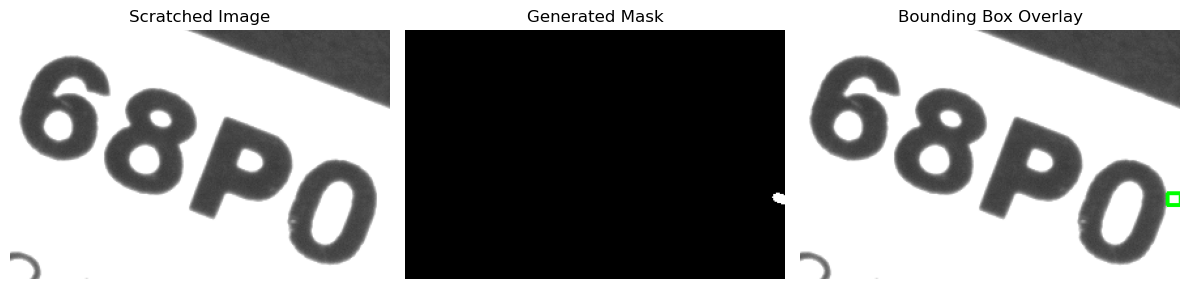

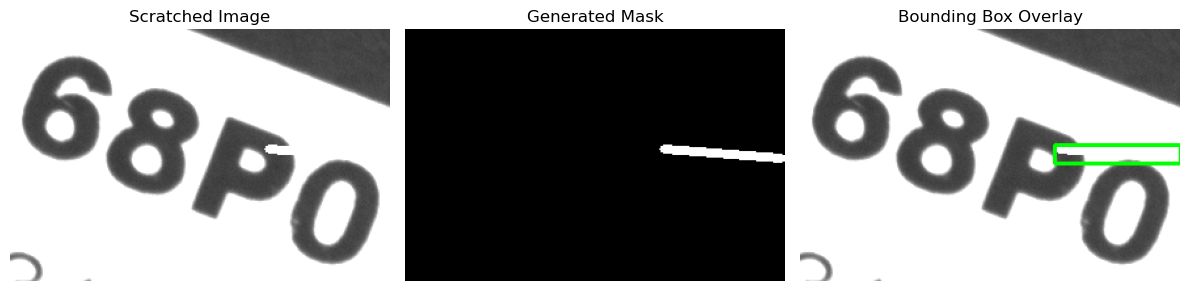

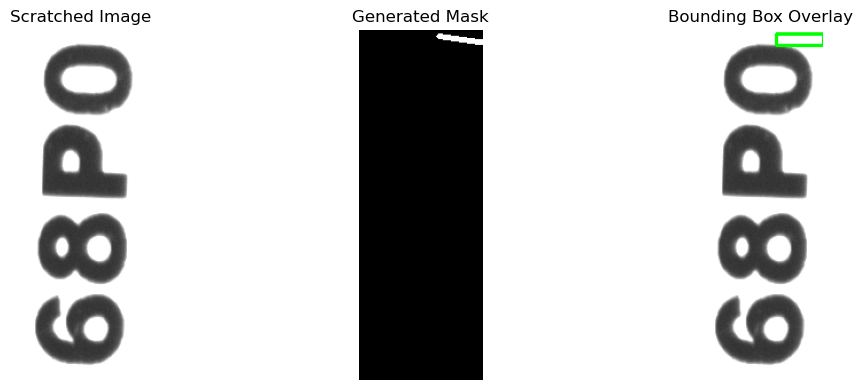

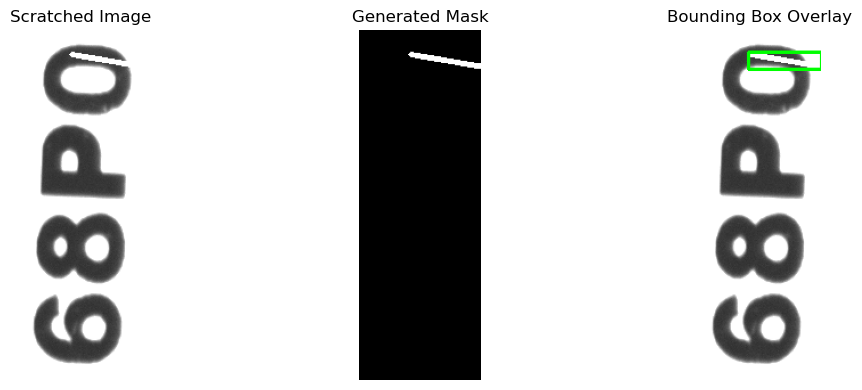

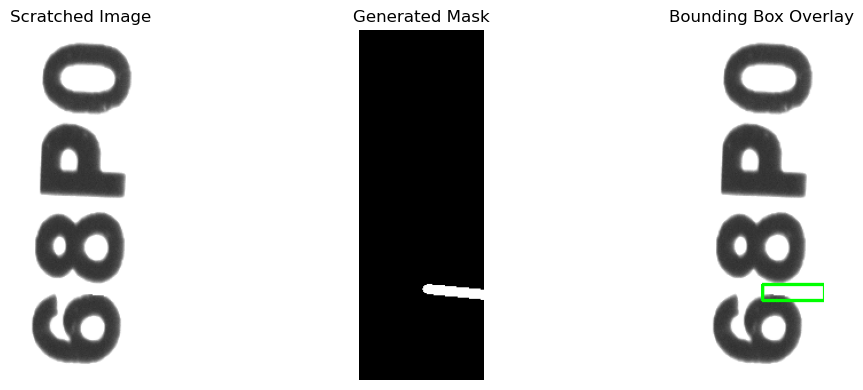

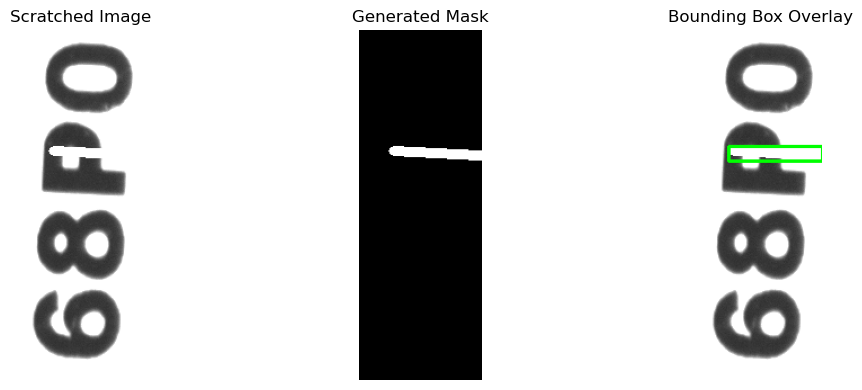

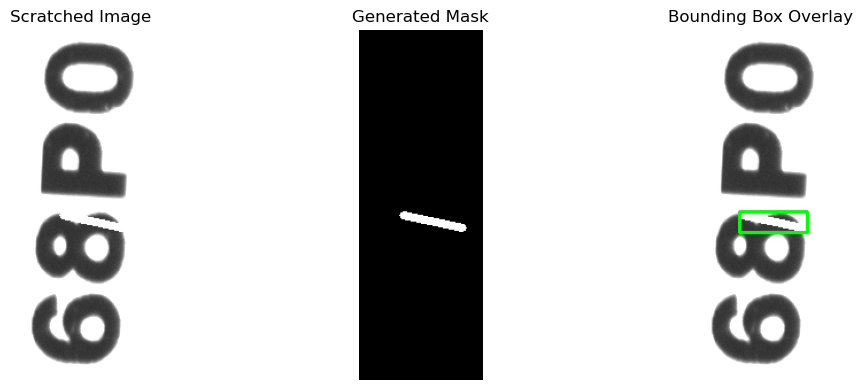

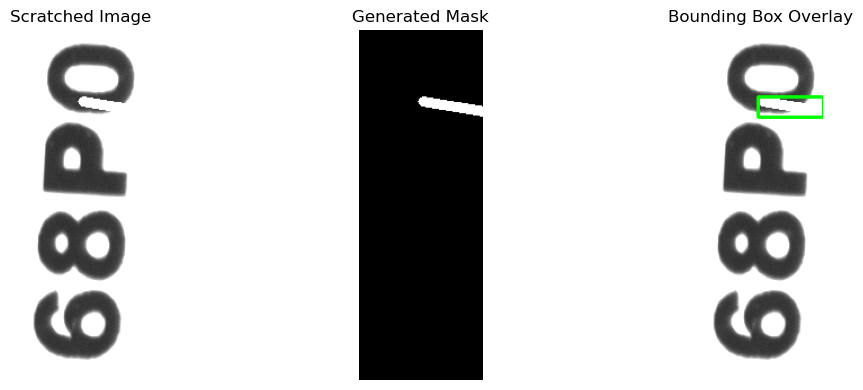

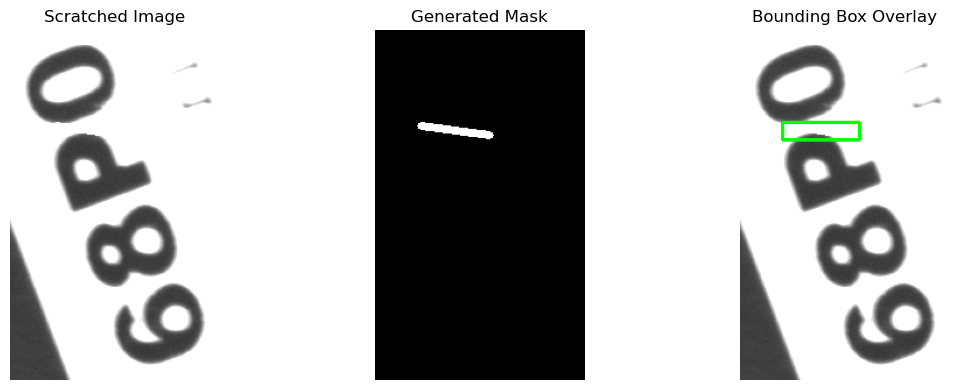

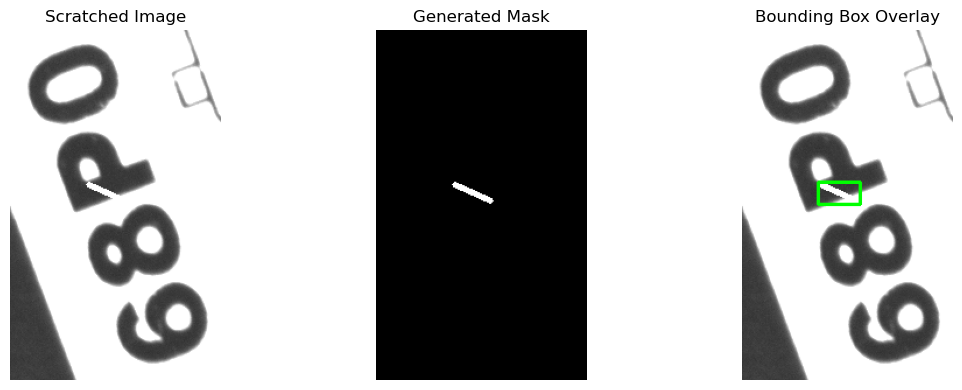

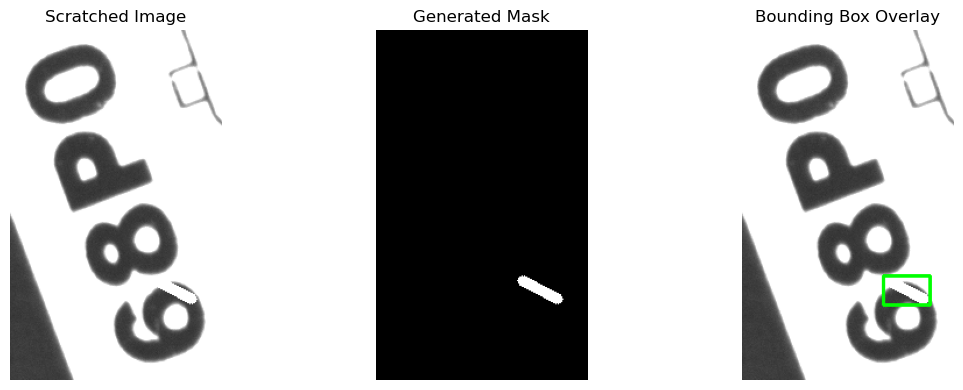

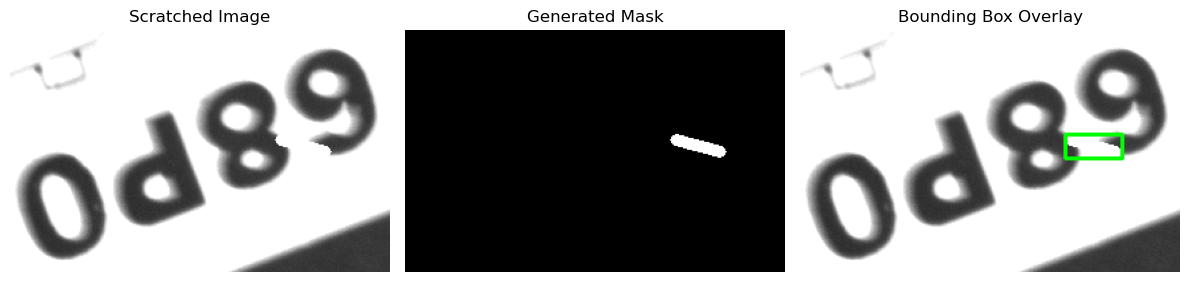

In [ ]:
# Paths
img_folder = 'augmented_bad'
mask_folder = 'augmented_masks'

# Load image and corresponding mask
for fname in os.listdir(img_folder):
    if fname.endswith('.png') or fname.endswith('.jpg'):
        img_path = os.path.join(img_folder, fname)
        mask_path = os.path.join(mask_folder, fname)

        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(mask_path, 0)  # grayscale mask

        # Draw bounding box from mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        bbox_image = image.copy()

        for cnt in contours:
            if cv2.contourArea(cnt) > 50:  # ignore small regions
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(bbox_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

        bbox_rgb = cv2.cvtColor(bbox_image, cv2.COLOR_BGR2RGB)

        # Plot
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title("Scratched Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Generated Mask")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(bbox_rgb)
        plt.title("Bounding Box Overlay")
        plt.axis('off')

        plt.tight_layout()
        plt.show()
